In [1]:
# Neste lab, foi utilizado Python 3.7

import collections
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import nltk

data = pd.read_csv('https://raw.githubusercontent.com/rafaelsguerra/information_retrieval/master/lab02/results.csv?token=AQ0l7ErszDucyKRcPVrDXjssw3HDFhaZks5cvavRwA%3D%3D')

In [2]:
data_text = pd.DataFrame(data = data, columns = ['text'])

In [3]:
text = []

for i in range(0, data_text.size):
    string = data_text.loc[[i], ['text']].get_values().item(0)
    splitted = re.split("[ ,.]", string)
    for palavra in splitted:
        if len(palavra) > 2:
            text.append(palavra.lower())

In [4]:
c = collections.Counter(text)

In [5]:
count_more_than_1000 = 0

values = sorted(c.values())

for value in reversed(values):
    if value >= 1000:
        count_more_than_1000 += 1
    else:
        break

In [6]:
count_once = 0

for value in values:
    if value <= 1:
        count_once += 1
    else:
        break

In [7]:
total_documents = data_text.size
total_word_occurrencies = sum(c.values())
vocabulary_size = len(c.keys())

In [8]:
print("Total documents:                            " + str(total_documents) + "\n" + 
      "Total word occurencies:                     " + str(total_word_occurrencies) + "\n" +
      "Vocabulary size:                            " + str(vocabulary_size) + "\n" + 
      "Words occurring more than 1000 times:       " + str(count_more_than_1000) + "\n" +
      "Words occurring once:                       " + str(count_once))

Total documents:                            249
Total word occurencies:                     155839
Vocabulary size:                            26997
Words occurring more than 1000 times:       9
Words occurring once:                       15138


In [9]:
results = []

for i in range(len(c.most_common(50))):
    results.append((c.most_common(50)[i][0], c.most_common(50)[i][1], i + 1))

labels = ['Word', 'Freq', 'Rank']
df = pd.DataFrame.from_records(data = results, columns=labels)
df['Pr(%)'] = df.Freq / total_word_occurrencies
df['r*Pr'] = df.Rank * df['Pr(%)']
df

Word  Freq  Rank     Pr(%)      r*Pr
0          que  6514     1  0.041800  0.041800
1         para  2305     2  0.014791  0.029582
2          uma  2201     3  0.014124  0.042371
3          com  2178     4  0.013976  0.055904
4          não  1949     5  0.012506  0.062532
5          por  1331     6  0.008541  0.051245
6         como  1302     7  0.008355  0.058483
7         mais  1192     8  0.007649  0.061191
8          dos  1060     9  0.006802  0.061217
9          mas   945    10  0.006064  0.060640
10         sua   811    11  0.005204  0.057245
11         foi   751    12  0.004819  0.057829
12         das   714    13  0.004582  0.059561
13         seu   702    14  0.004505  0.063065
14        anos   567    15  0.003638  0.054576
15         ser   498    16  0.003196  0.051130
16      também   489    17  0.003138  0.053344
17        pelo   485    18  0.003112  0.056019
18         são   481    19  0.003087  0.058644
19        pela   466    20  0.002990  0.059805
20         nos   463    21  0.002971  0.062391
21         ele   428    22  0.002746  0.060421
22       sobre   425    23  0.002727  0.062725
23       entre   414    24  0.002657  0.063758
24        isso   413    25  0.002650  0.066254
25      quando   399    26  0.002560  0.066569
26       muito   388    27  0.002490  0.067223
27        está   371    28  0.002381  0.066659
28  presidente   362    29  0.002323  0.067364
29   bolsonaro   358    30  0.002297  0.068917
30         era   353    31  0.002265  0.070220
31         tem   335    32  0.002150  0.068789
32     governo   335    33  0.002150  0.070939
33       ainda   334    34  0.002143  0.072870
34      depois   329    35  0.002111  0.073890
35        país   328    36  0.002105  0.075771
36        seus   328    37  0.002105  0.077875
37         até   312    38  0.002002  0.076079
38      brasil   307    39  0.001970  0.076829
39         nas   300    40  0.001925  0.077003
40         aos   286    41  0.001835  0.075244
41         sem   274    42  0.001758  0.073845
42         ter   255    43  0.001636  0.070361
43        suas   239    44  0.001534  0.067480
44      porque   234    45  0.001502  0.067570
45     pessoas   233    46  0.001495  0.068776
46        essa   233    47  0.001495  0.070271
47      contra   231    48  0.001482  0.071150
48        dois   230    49  0.001476  0.072318
49     segundo   228    50  0.001463  0.073152

In [10]:
labels = ["Word", "Freq"]
all_words_df = pd.DataFrame(c.most_common(), columns = labels)
all_words_df["Rank"] = all_words_df["Freq"].rank(ascending = False)
all_words_df["Pr(%)"] = all_words_df.Freq / total_word_occurrencies
all_words_df["r*Pr"] = all_words_df.Rank * all_words_df["Pr(%)"]

In [11]:
print("Considerando todo o vocabulário, o maior valor c = Rank * Pr é de " + str(all_words_df['r*Pr'].max()))

Considerando todo o vocabulário, o maior valor c = Rank * Pr é de 0.1459679541064817


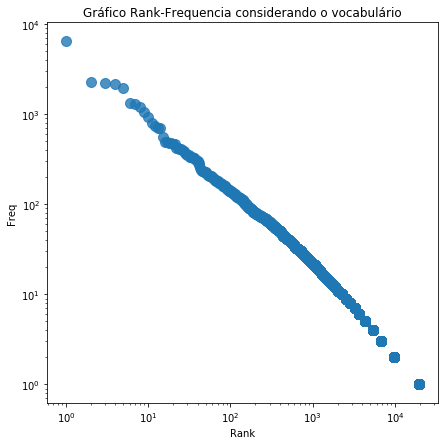

In [12]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
ax.set_title("Gráfico Rank-Frequencia considerando o vocabulário")
sns.regplot("Rank", "Freq", all_words_df, ax=ax, fit_reg = False, scatter_kws={"s": 100})

In [13]:
bigrams = nltk.bigrams(text)
bigram_freq = nltk.FreqDist(bigrams)

bigrams_df = pd.DataFrame(bigram_freq.most_common(), columns = ["Bigram", "Freq"])
bigrams_df["Rank"] = bigrams_df["Freq"].rank(ascending = False)
bigrams_df["Pr(%)"] = bigrams_df.Freq / total_word_occurrencies
bigrams_df["r*Pr"] = bigrams_df.Rank * bigrams_df["Pr(%)"]

In [14]:
print("Considerando os bigramas, o maior valor c = Rank * Pr é de " + str(bigrams_df['r*Pr'].max()))

Considerando os bigramas, o maior valor c = Rank * Pr é de 0.4364985658275528


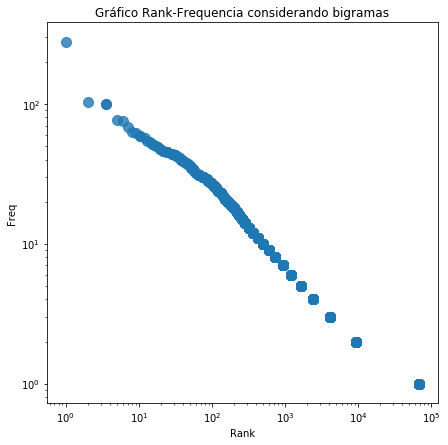

In [15]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
ax.set_title("Gráfico Rank-Frequencia considerando bigramas")
sns.regplot("Rank", "Freq", bigrams_df, ax=ax, fit_reg = False, scatter_kws={"s": 100})

In [16]:
table = list(range(1, 11))

table_df = pd.DataFrame(data = table, columns = ["n"])
table_df["PP"] = 1/(table_df.n * (table_df.n + 1))
table_df["ANW"] = sum(value == table_df.n for value in c.values())
table_df["AP"] = table_df["ANW"] / vocabulary_size

table_df = table_df[["n", "PP", "AP", "ANW"]]

table_df.rename(columns = {"n": "Number of Ocurrencies (n)",
                          "PP": "Predicted Proportion",
                          "ANW": "Actual Number of Words",
                          "AP": "Actual Proportion"}, inplace = True)

table_df

Number of Ocurrencies (n)  Predicted Proportion  Actual Proportion  \
0                          1              0.500000           0.560729   
1                          2              0.166667           0.150795   
2                          3              0.083333           0.070341   
3                          4              0.050000           0.041486   
4                          5              0.033333           0.030337   
5                          6              0.023810           0.019187   
6                          7              0.017857           0.015854   
7                          8              0.013889           0.012187   
8                          9              0.011111           0.010964   
9                         10              0.009091           0.009334   

   Actual Number of Words  
0                   15138  
1                    4071  
2                    1899  
3                    1120  
4                     819  
5                     518  
6                     428  
7                     329  
8                     296  
9                     252